# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instala previamente el paquete kohonen en R.



In [2]:
#SOM example using wines data set
library(kohonen)

set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

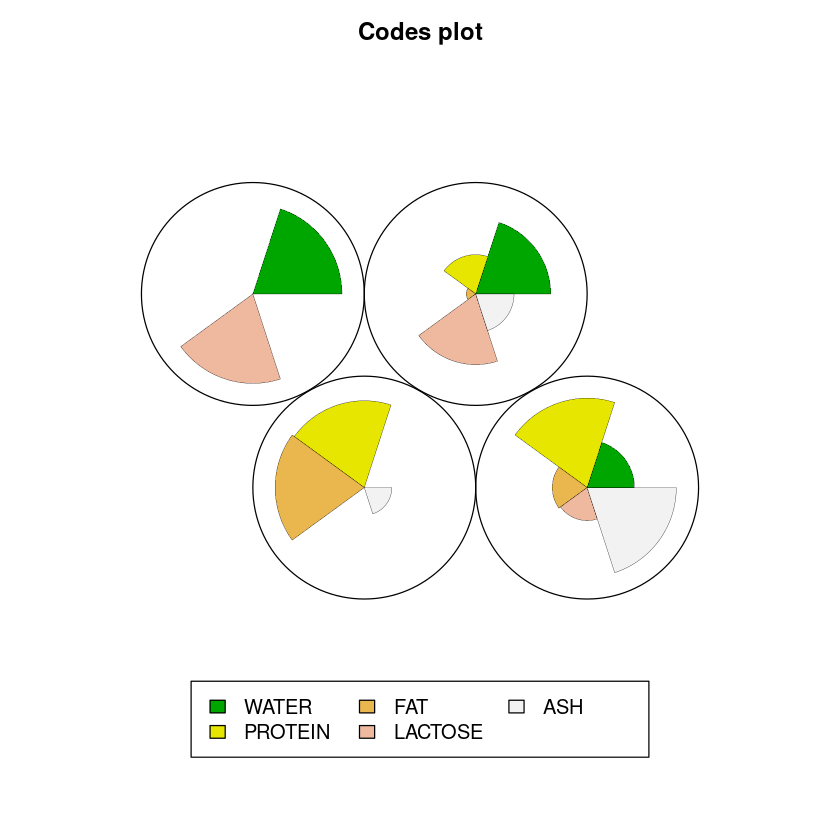

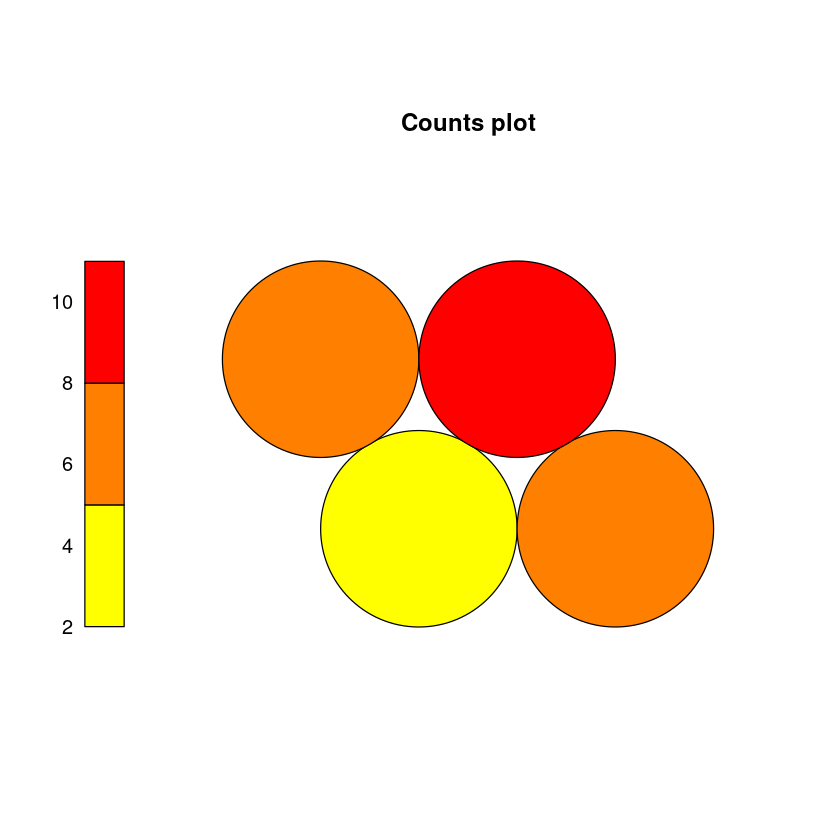

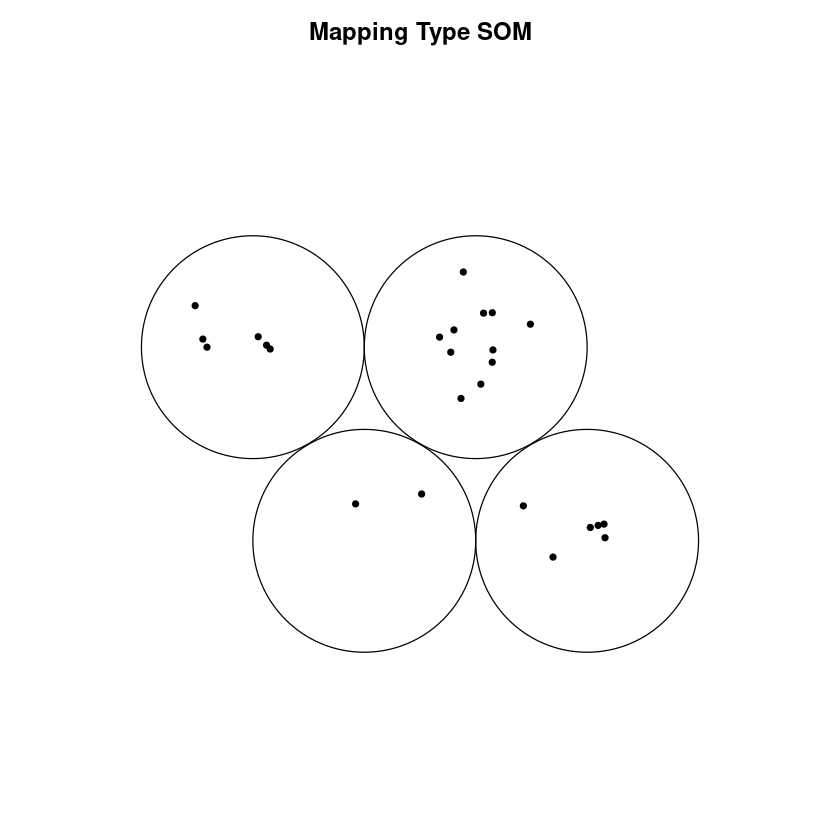

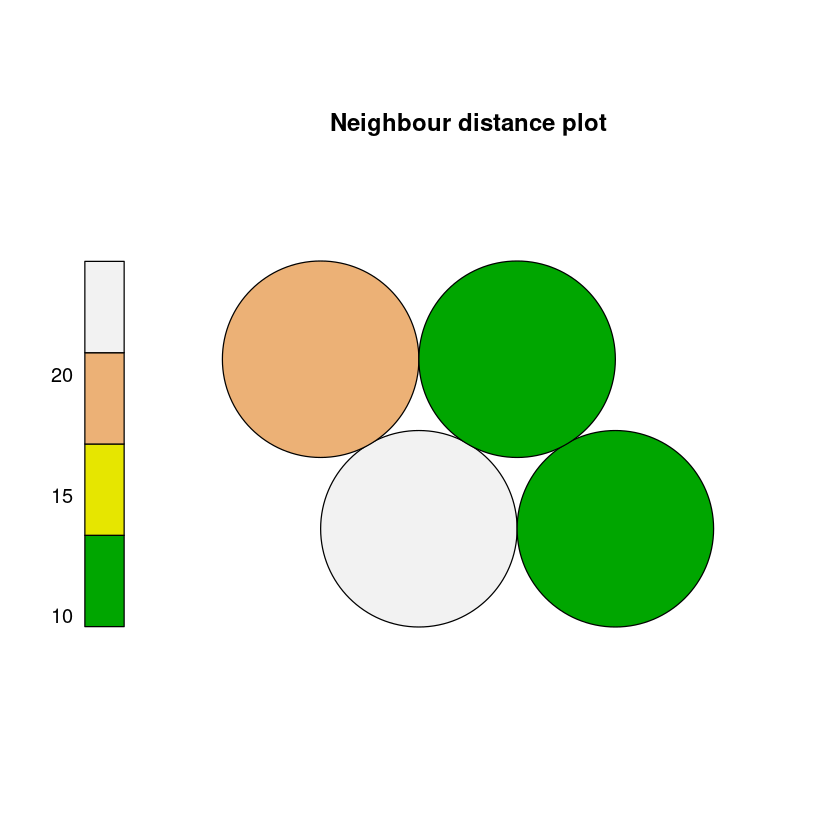

In [3]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


Ejercicio 1: <br>
a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.<br>
    - Codes plot: Muestra los pesos relacionados a los nodos. En este caso, muestra la distribución de los componentes que componen la leche de cada grupo.
    - Counts plot: Muestra la cantidad de objetos que son mapeados en cada uno de los nodos.
    - Mappings type SOM: Muestra donde son mapeados los objetos.
    - Neightbour distance plot: Muestra la suma de distancias de todos los vecinos cercanos.
    
    El output corresponde a un som (self organizing map) de dimensiones 2x2 en este caso
b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. <br>

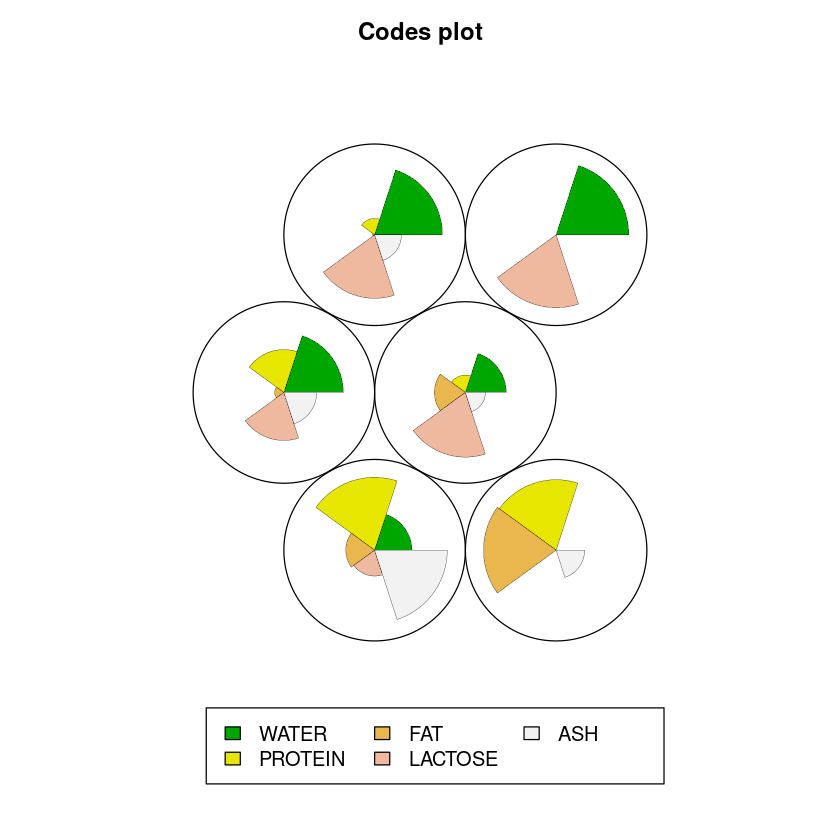

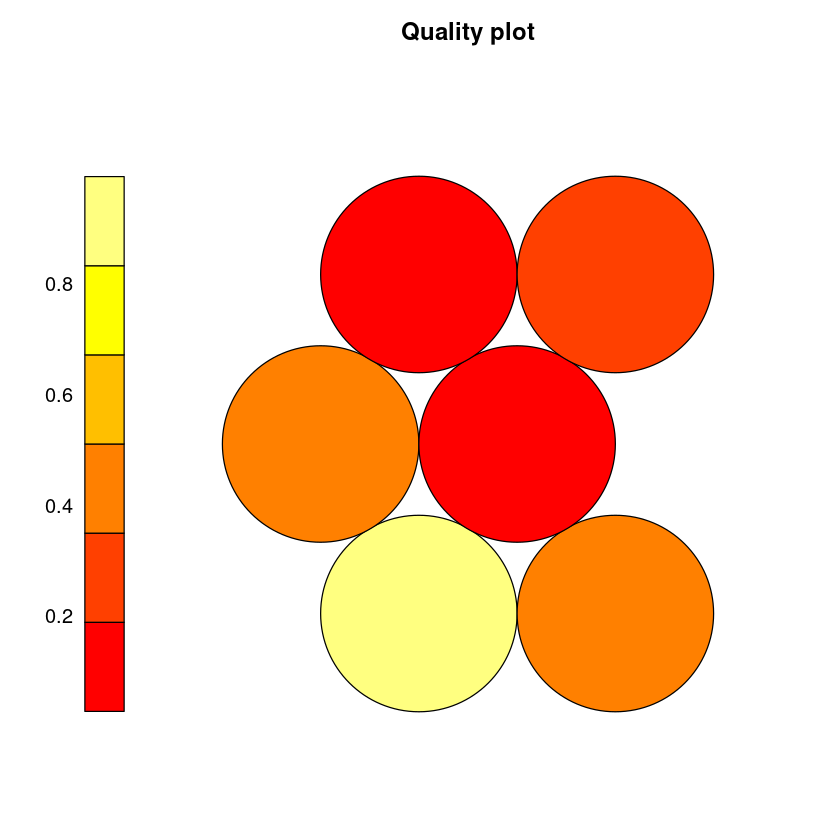

In [39]:
sommap2 <- som(scale(datos), grid = somgrid(2, 3, "hexagonal"))
plot(sommap2)
plot(sommap2, type = "quality")

**R:**<br>
Visitando el pdf https://cran.r-project.org/web/packages/kohonen/kohonen.pdf (pág 12)
La visualización **quality** muestra la distancia media de los objetos mapeados en cada uno de los grupos.
Mientras menor sea la distancia significa que los objetos son representados de mejor forma dentro de los grupos correspondientes.

Podemos ver que de los 6 grupos creados existen dos rojos (distancia 0.2) y uno naranjo distancia (0.4) los que corresponden a los grupos mas representativos.

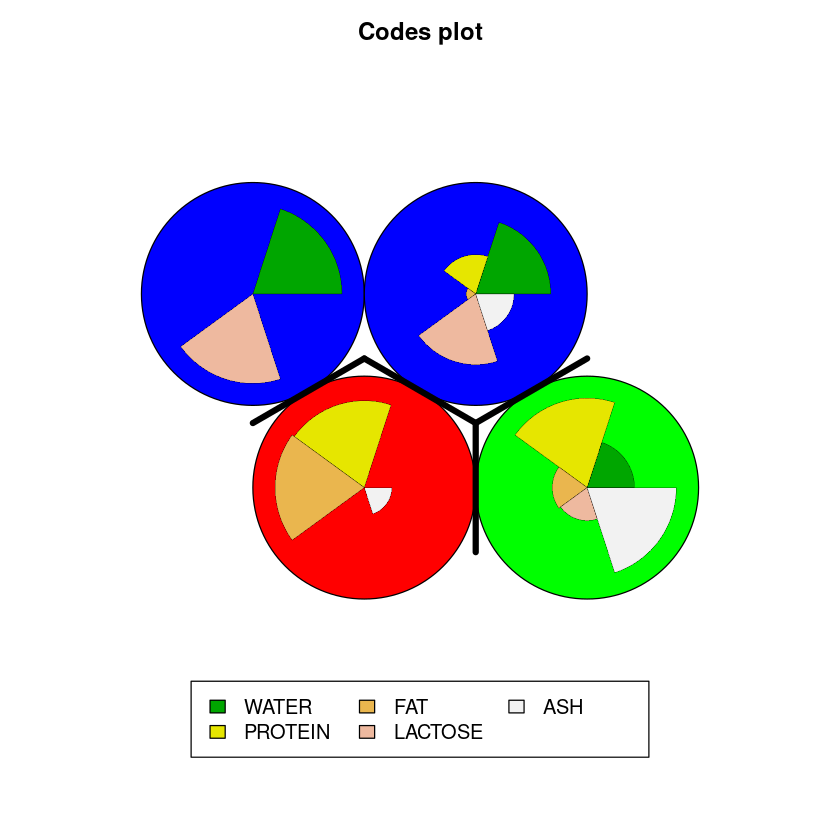

In [42]:
 mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Ejercicio 2: <br>
a) Explique como funciona esta nueva visualización.<br>
b) Interprete y comente los resultados obtenidos. <br>

**R:**<br>
__a__: 
se utliliza **cutree** para cortal el arbol jerárquico generado en la cantidad de grupos.<br>
Luego se utilizó **add.cluster.boundaries**, lo que agregará líneas para visualizar cuales grupos deberían juntarse o no estar separados (los dos grupos azules en este caso) <br>

__b__: La interpretación más natural es que dada la definición anterior los dos primeros grupos deberían formar uno solo (debido al add.cluster.boundaries). 


Ejercicio 3: <br>
a) Proponga un nuevo conjunto de datos a los cuales aplicar este algoritmo. Justifique su elección<br>
b) Realice las estimaciones y discuta sus resultados.<br>

**R:**<br>
**dataset escogido**: Ausentismo en el trabajo<br>
**url e información**: https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work<br>
**archivo**: absenteeism_at_work.csv<br>
La razón de por qué escogí este dataset es simplemente que me parece interesante los parámetros que pueden influenciar el motivo del ausentismo en el trabajo.

In [56]:
ClusterPurity <- function(clusters, classes) {
  sum(apply(table(classes, clusters), 2, max)) / length(clusters)
}
datos <- read.csv("absenteeism_at_work.csv",sep=";",header=TRUE)
datos[1]<-NULL #elimino la primera columna (ID)
datos <- as.data.frame(datos)
summary(datos)

 Reason.for.absence Month.of.absence Day.of.the.week    Seasons     
 Min.   : 0.00      Min.   : 0.000   Min.   :2.000   Min.   :1.000  
 1st Qu.:13.00      1st Qu.: 3.000   1st Qu.:3.000   1st Qu.:2.000  
 Median :23.00      Median : 6.000   Median :4.000   Median :3.000  
 Mean   :19.22      Mean   : 6.324   Mean   :3.915   Mean   :2.545  
 3rd Qu.:26.00      3rd Qu.: 9.000   3rd Qu.:5.000   3rd Qu.:4.000  
 Max.   :28.00      Max.   :12.000   Max.   :6.000   Max.   :4.000  
 Transportation.expense Distance.from.Residence.to.Work  Service.time  
 Min.   :118.0          Min.   : 5.00                   Min.   : 1.00  
 1st Qu.:179.0          1st Qu.:16.00                   1st Qu.: 9.00  
 Median :225.0          Median :26.00                   Median :13.00  
 Mean   :221.3          Mean   :29.63                   Mean   :12.55  
 3rd Qu.:260.0          3rd Qu.:50.00                   3rd Qu.:16.00  
 Max.   :388.0          Max.   :52.00                   Max.   :29.00  
      Age    

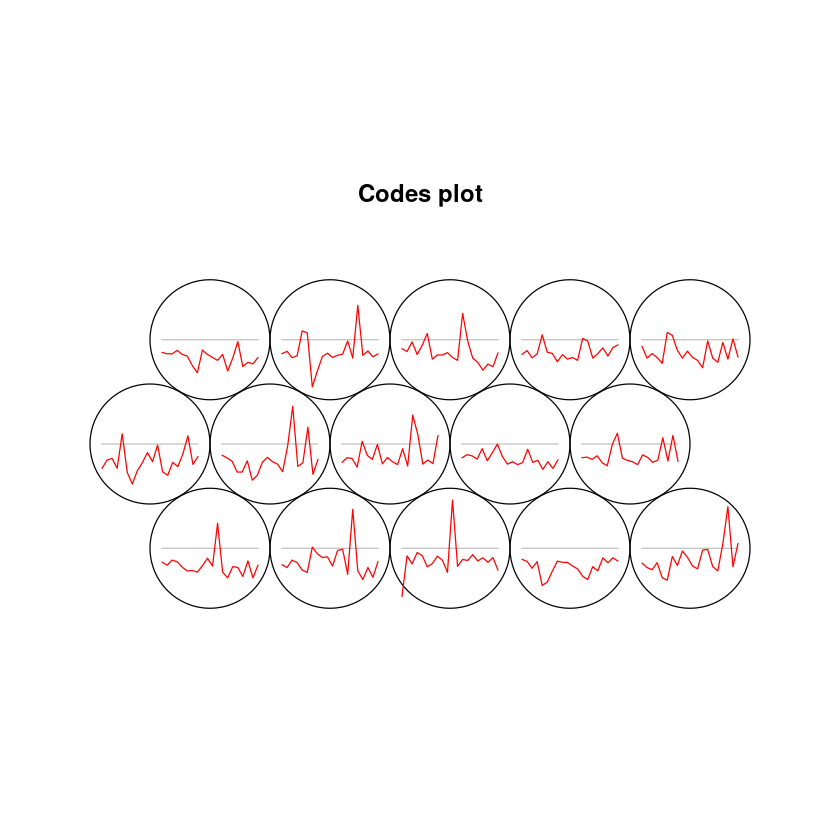

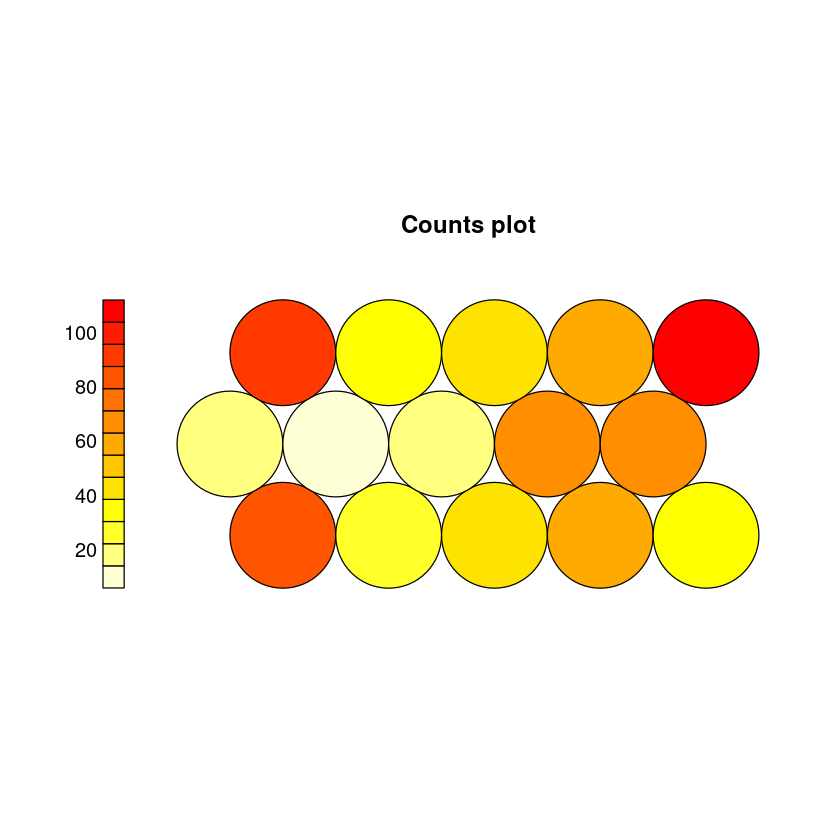

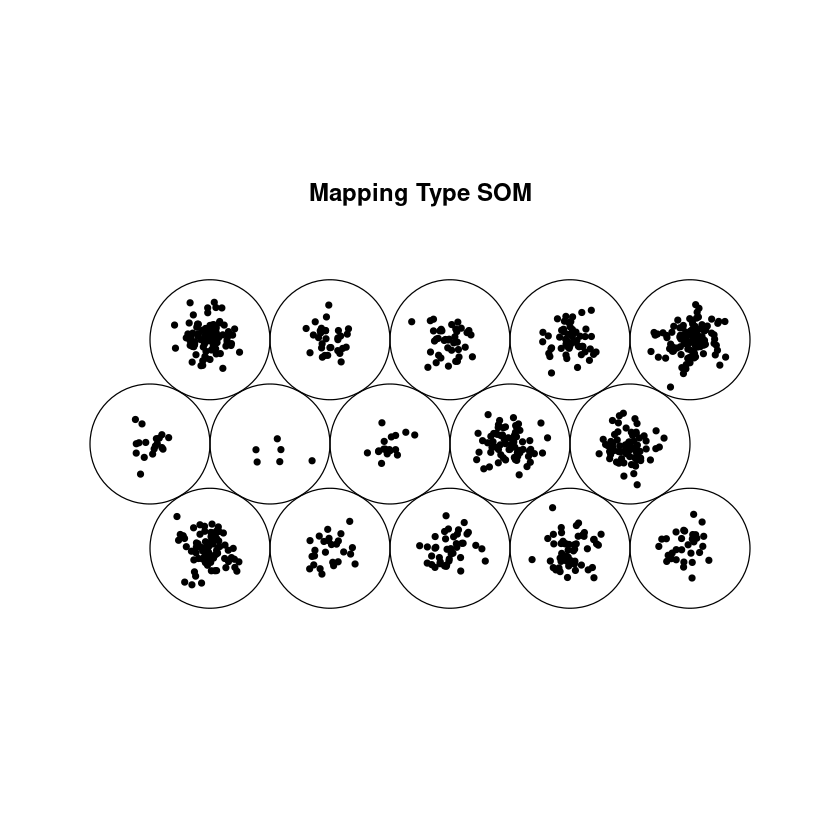

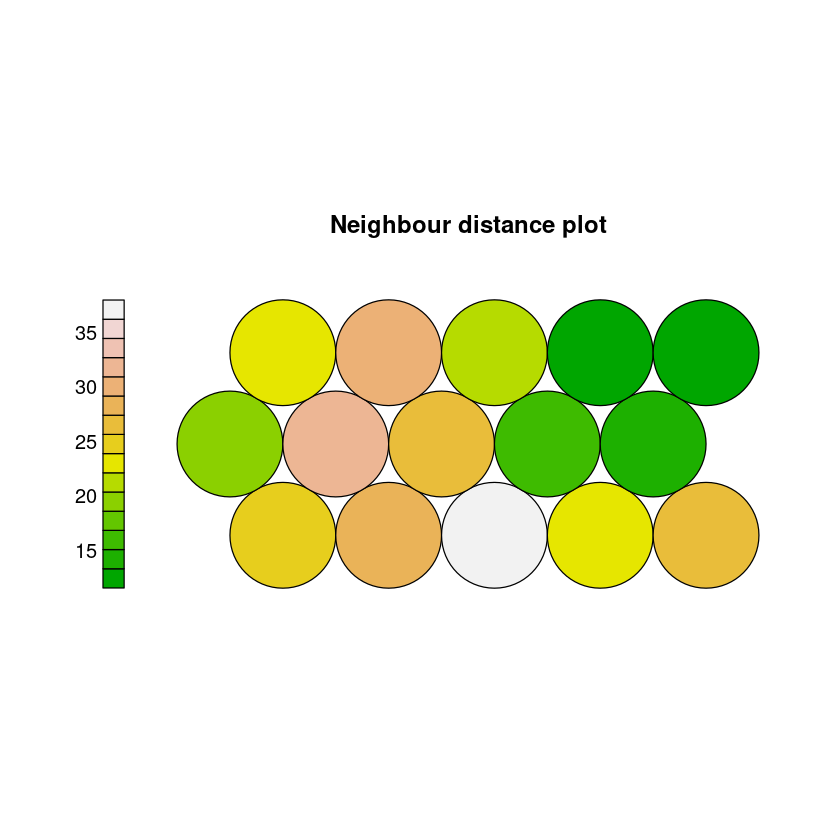

In [64]:
sommap <- som(scale(datos), grid = somgrid(5, 3, "hexagonal")) #transforma datos en 2d
plot(sommap)
colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

Escogí una cantidad de grupos de 5x3=**15** ya que probando con la cantidad de grupos este valor mostró que los datos estaban mejor representados por sus grupos (los datos estaban más concentrados a los centroides de cada uno de los grupos y la distancia entre ellos es relativamente aceptable) <br>
Aunque me cuesta interpretar con la información visual actual cuál es la causa o parámetro que afecta mayormente la ausencia al trabajo creo que con los grupos definidos podría realizarse un estudio de los motivos que cada uno tiene en común y de esta forma poder realizar una conclusión más elaborada.
